In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_pickle('appReviews_dataset_after_rq1.pkl')

# Monetization Scheme

In [3]:
#converting price to float
df['Price'] = pd.to_numeric(df['Price'], downcast="float")

#adding Paid column
conditions = [(df['Price'] == 0),(df['Price'] != 0)]
values = ['Free', 'Paid']
df['Paid'] = np.select(conditions, values)

#fixing ad supported
conditions = [(df['AdSupported'] == 'True'),(df['AdSupported'] == '0'),(df['AdSupported'] == '')]
values = ['True', 'False', 'False']
df['AdSupported'] = np.select(conditions, values)

In [4]:
#new condensed dataframe
df_mone = pd.DataFrame()
df_mone['AppId'] = df['AppId']
df_mone['Score'] = df['Score']
df_mone['TextSentiment'] = df['TextSentiment']
df_mone['Paid'] = df['Paid']
df_mone['AdSupported'] = df['AdSupported']
df_mone['OffersIAP'] = df['OffersIAP']
df_mone['InAppProductPrice Low'] = df['InAppProductPrice Low']
df_mone['InAppProductPrice High'] = df['InAppProductPrice High']
df_mone = df_mone.sort_values('AppId')

#converting all review scores for an app into a single column in the new condensed dataframe
df_mone2 = pd.DataFrame(df_mone.groupby('AppId')['Score'].mean())
df_mone2 = pd.DataFrame(df_mone2).reset_index()
df_mone2 = df_mone2.drop(df_mone2[df_mone2.Score == 0].index)
df_mone2 = df_mone2.rename(columns={'index':'AppId'})
df_mone2 = df_mone2.sort_values('AppId')

#converting all sentiment scores for an app into a single column in the new condensed dataframe
df_mone3 = pd.DataFrame(df_mone.groupby('AppId')['TextSentiment'].mean())
df_mone3 = pd.DataFrame(df_mone3).reset_index()
df_mone3 = df_mone3.drop(df_mone3[df_mone3.TextSentiment == 0].index)
df_mone3 = df_mone3.rename(columns={'index':'AppId'})
df_mone3 = df_mone3.sort_values('AppId')

df_mone = df_mone.drop_duplicates(subset=['AppId'])
df_mone = df_mone.drop(columns=['Score'])
df_mone = df_mone.drop(columns=['TextSentiment'])

df_mone_full = df_mone.merge(df_mone2, how='inner', on='AppId')
df_mone_full = df_mone_full.merge(df_mone3, how='inner', on='AppId')
df_mone_full

,AppId,Paid,AdSupported,OffersIAP,InAppProductPrice Low,InAppProductPrice High,Score,TextSentiment
0,AutomateIt.mainPackage,Free,True,True,1.79,0.00,3.398382,0.227146
1,DHQ.FileManagerForAndroid,Free,False,True,0.72,174.99,3.563380,0.217912
2,OCTech.Mobile.Applications.OBDLink,Free,False,True,15.99,79.99,4.036036,0.336906
3,accurate.local.weather.forecast.channel,Free,True,False,0.00,0.00,4.622614,0.463665
4,ae.brandsforless.android,Free,False,False,0.00,0.00,3.288050,0.245831
...,...,...,...,...,...,...,...,...
3049,yallashoot.shoot.yalla.com.yallashoot.newapp,Free,True,False,0.00,0.00,4.423423,0.288646
3050,yo.app,Paid,False,False,0.00,0.00,4.415415,0.390520
3051,yo.app.free,Free,True,True,0.59,5.99,4.535535,0.414142
3052,younow.live,Free,False,True,0.99,349.99,3.103103,0.166314


In [5]:
#an app can be Free/Paid, NoAds/Ads, NoIAP/IAP
conditions = [((df_mone_full['Paid'] == 'Free') & (df_mone_full['AdSupported'] == 'False') & (df_mone_full['OffersIAP'] == 'False')),
              ((df_mone_full['Paid'] == 'Paid') & (df_mone_full['AdSupported'] == 'False') & (df_mone_full['OffersIAP'] == 'False')),
             ((df_mone_full['Paid'] == 'Free') & (df_mone_full['AdSupported'] == 'True') & (df_mone_full['OffersIAP'] == 'False')),
             ((df_mone_full['Paid'] == 'Paid') & (df_mone_full['AdSupported'] == 'True') & (df_mone_full['OffersIAP'] == 'False')),
             ((df_mone_full['Paid'] == 'Free') & (df_mone_full['AdSupported'] == 'True') & (df_mone_full['OffersIAP'] == 'True')),
             ((df_mone_full['Paid'] == 'Paid') & (df_mone_full['AdSupported'] == 'True') & (df_mone_full['OffersIAP'] == 'True')),
             ((df_mone_full['Paid'] == 'Free') & (df_mone_full['AdSupported'] == 'False') & (df_mone_full['OffersIAP'] == 'True')),
             ((df_mone_full['Paid'] == 'Paid') & (df_mone_full['AdSupported'] == 'False') & (df_mone_full['OffersIAP'] == 'True'))]
values = ['Free', 'Paid','Free + Ads', 'Paid + Ads','Free + Ads + IAP', 'Paid + Ads + IAP','Free + IAP', 'Paid + IAP']
df_mone_full['Monetization'] = np.select(conditions, values)

df_mone_full

,AppId,Paid,AdSupported,OffersIAP,InAppProductPrice Low,InAppProductPrice High,Score,TextSentiment,Monetization
0,AutomateIt.mainPackage,Free,True,True,1.79,0.00,3.398382,0.227146,Free + Ads + IAP
1,DHQ.FileManagerForAndroid,Free,False,True,0.72,174.99,3.563380,0.217912,Free + IAP
2,OCTech.Mobile.Applications.OBDLink,Free,False,True,15.99,79.99,4.036036,0.336906,Free + IAP
3,accurate.local.weather.forecast.channel,Free,True,False,0.00,0.00,4.622614,0.463665,Free + Ads
4,ae.brandsforless.android,Free,False,False,0.00,0.00,3.288050,0.245831,Free
...,...,...,...,...,...,...,...,...,...
3049,yallashoot.shoot.yalla.com.yallashoot.newapp,Free,True,False,0.00,0.00,4.423423,0.288646,Free + Ads
3050,yo.app,Paid,False,False,0.00,0.00,4.415415,0.390520,Paid
3051,yo.app.free,Free,True,True,0.59,5.99,4.535535,0.414142,Free + Ads + IAP
3052,younow.live,Free,False,True,0.99,349.99,3.103103,0.166314,Free + IAP


In [6]:
def set_mone_colors(df_):
    colors=[]
    for mon in df_['Monetization']:
        if mon == 'Free':
            colors.append('#FCF279')
        elif mon == 'Paid':
            colors.append('#FCF279')
        elif mon == 'Free + Ads':
            colors.append('#FF89DC')
        elif mon == 'Paid + Ads':
            colors.append('#FF89DC')
        elif mon == 'Free + IAP':
            colors.append('#A1DDFF')
        elif mon == 'Paid + IAP':
            colors.append('#A1DDFF')
        else:
            colors.append('#A18DEB')
    return colors

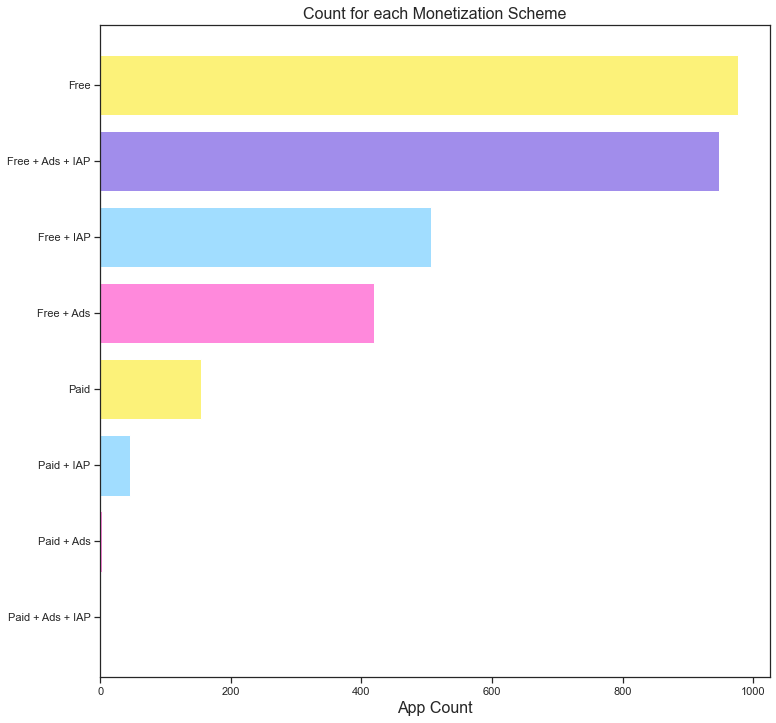

In [7]:
df_mone_full_count = df_mone_full.groupby('Monetization').count()
df_mone_full_count = pd.DataFrame(df_mone_full_count).reset_index()
df_mone_full_count = df_mone_full_count.rename(columns={'index':'Monetization'})
df_mone_full_count = df_mone_full_count.sort_values('AppId',ascending=True)

colors = set_mone_colors(df_mone_full_count)

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(12, 12))
ax.barh(df_mone_full_count['Monetization'], df_mone_full_count['AppId'], color=colors)
plt.title('Count for each Monetization Scheme', fontsize=16)
plt.xlabel('App Count', fontsize=16)
plt.ylabel('', fontsize=16)
plt.show()

In [8]:
df_mone_full_count = df_mone_full_count.drop(columns=['Paid'])
df_mone_full_count = df_mone_full_count.drop(columns=['AdSupported'])
df_mone_full_count = df_mone_full_count.drop(columns=['OffersIAP'])
df_mone_full_count = df_mone_full_count.drop(columns=['InAppProductPrice Low'])
df_mone_full_count = df_mone_full_count.drop(columns=['InAppProductPrice High'])
df_mone_full_count = df_mone_full_count.drop(columns=['Score'])
df_mone_full_count = df_mone_full_count.drop(columns=['TextSentiment'])
df_mone_full_count = df_mone_full_count.sort_values('AppId',ascending=False)

In [9]:
df_mone_full_count

,Monetization,AppId
0,Free,976
2,Free + Ads + IAP,947
3,Free + IAP,506
1,Free + Ads,419
4,Paid,155
7,Paid + IAP,46
5,Paid + Ads,3
6,Paid + Ads + IAP,2


In [10]:
df_mone_full = df_mone_full.drop(df_mone_full[df_mone_full.Monetization == 'Paid + Ads'].index)
df_mone_full = df_mone_full.drop(df_mone_full[df_mone_full.Monetization == 'Paid + Ads + IAP'].index)

# Review Score compared to Monetization 

Text(0, 0.5, '')

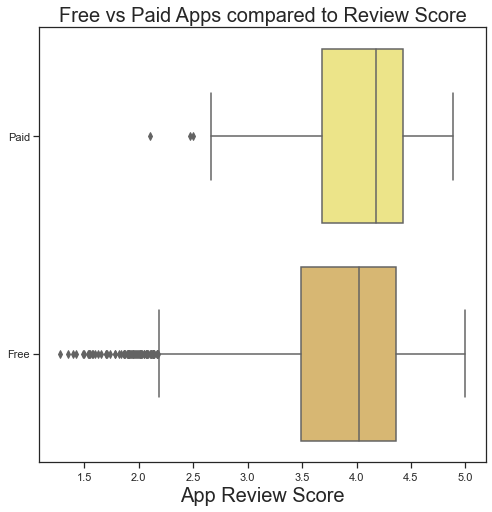

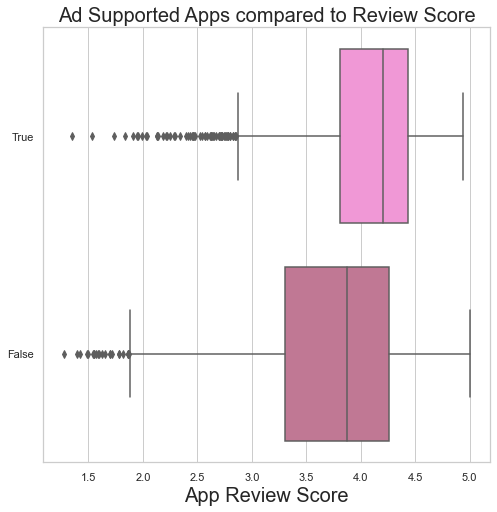

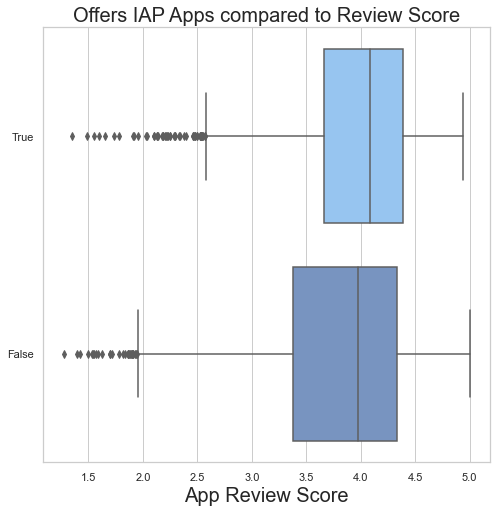

In [11]:
colors = ['#FCF279','#E8BD62']
colors2 = ['#FF89DC','#CC6C91']
colors3 = ['#88C5FF','#6C92CC']

fig, ax = plt.subplots(figsize=(8, 8))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Score", y="Paid", data=df_mone_full,palette=colors,order= ['Paid','Free'])   
plt.title('Free vs Paid Apps compared to Review Score', fontsize=20)
plt.xlabel('App Review Score', fontsize=20)
plt.ylabel('', fontsize=16)


fig, ax2 = plt.subplots(figsize=(8, 8))
ax2 = sns.boxplot(x="Score", y="AdSupported", data=df_mone_full,palette=colors2)   
plt.title('Ad Supported Apps compared to Review Score', fontsize=20)
plt.xlabel('App Review Score', fontsize=20)
plt.ylabel('', fontsize=16)

fig, ax3 = plt.subplots(figsize=(8, 8))
ax3 = sns.boxplot(x="Score", y="OffersIAP", data=df_mone_full,palette=colors3)   
plt.title('Offers IAP Apps compared to Review Score', fontsize=20)
plt.xlabel('App Review Score', fontsize=20)
plt.ylabel('', fontsize=16)

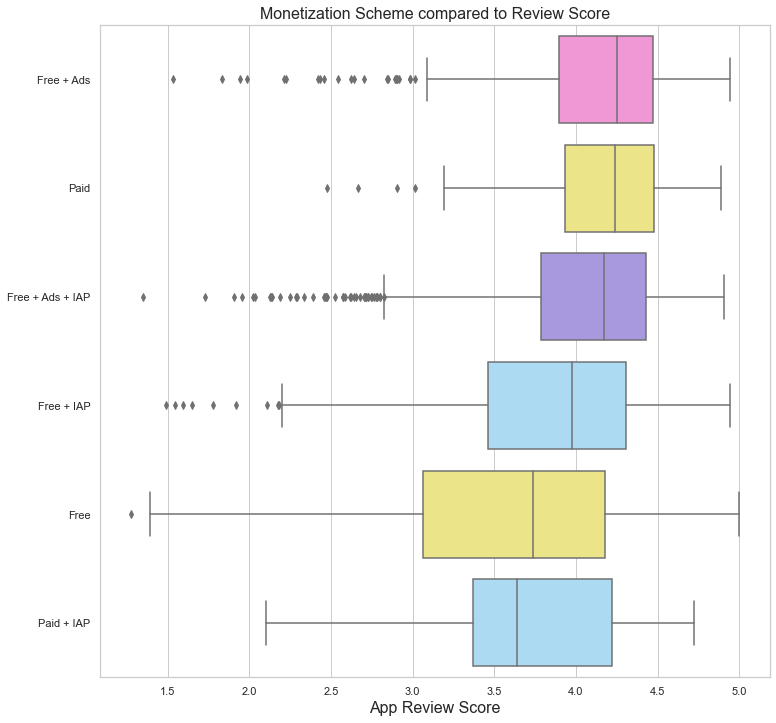

In [12]:
df_mone_full_med = df_mone_full.groupby('Monetization').median()
df_mone_full_med = pd.DataFrame(df_mone_full_med).reset_index()
df_mone_full_med = df_mone_full_med.rename(columns={'index':'Monetization'})
df_mone_full_med = df_mone_full_med.sort_values('Score',ascending=False)

colors = set_mone_colors(df_mone_full_med)

fig, ax = plt.subplots(figsize=(12, 12))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Score", y="Monetization", data=df_mone_full,order = df_mone_full_med['Monetization'],palette=colors)   
plt.title('Monetization Scheme compared to Review Score', fontsize=16)
plt.xlabel('App Review Score', fontsize=16)
plt.ylabel('', fontsize=16)
plt.show()

# Sentiment compared to Monetization

Text(0, 0.5, '')

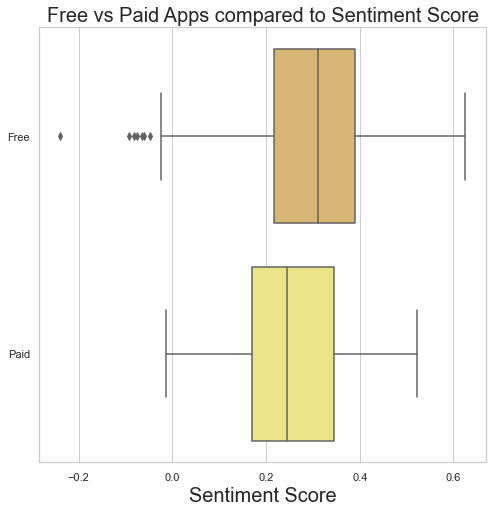

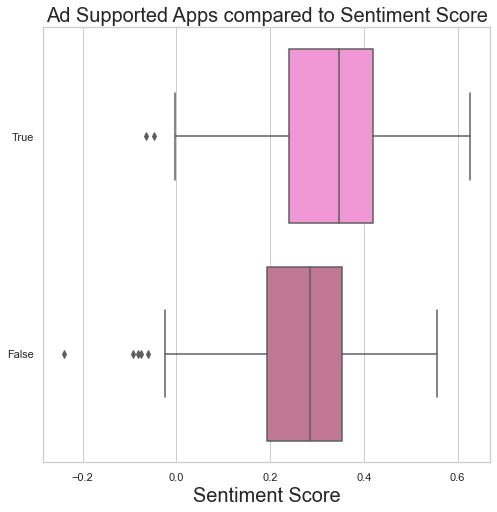

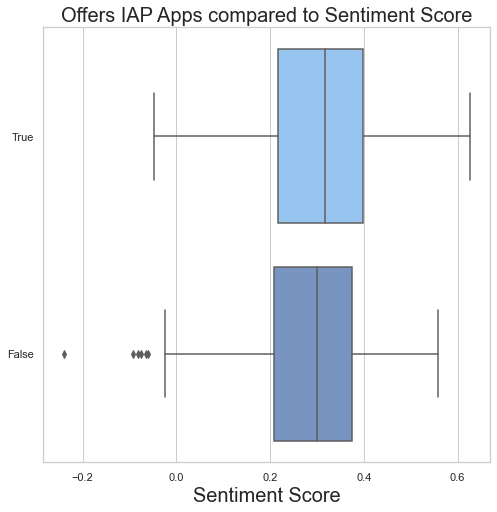

In [13]:
colors = ['#E8BD62','#FCF279']
colors2 = ['#FF89DC','#CC6C91']
colors3 = ['#88C5FF','#6C92CC']

fig, ax = plt.subplots(figsize=(8, 8))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="TextSentiment", y="Paid", data=df_mone_full,palette=colors,order= ['Free','Paid'])   
plt.title('Free vs Paid Apps compared to Sentiment Score', fontsize=20)
plt.xlabel('Sentiment Score', fontsize=20)
plt.ylabel('', fontsize=16)


fig, ax2 = plt.subplots(figsize=(8, 8))
ax2 = sns.boxplot(x="TextSentiment", y="AdSupported", data=df_mone_full,palette=colors2)   
plt.title('Ad Supported Apps compared to Sentiment Score', fontsize=20)
plt.xlabel('Sentiment Score', fontsize=20)
plt.ylabel('', fontsize=16)

fig, ax3 = plt.subplots(figsize=(8, 8))
ax3 = sns.boxplot(x="TextSentiment", y="OffersIAP", data=df_mone_full,palette=colors3)   
plt.title('Offers IAP Apps compared to Sentiment Score', fontsize=20)
plt.xlabel('Sentiment Score', fontsize=20)
plt.ylabel('', fontsize=16)

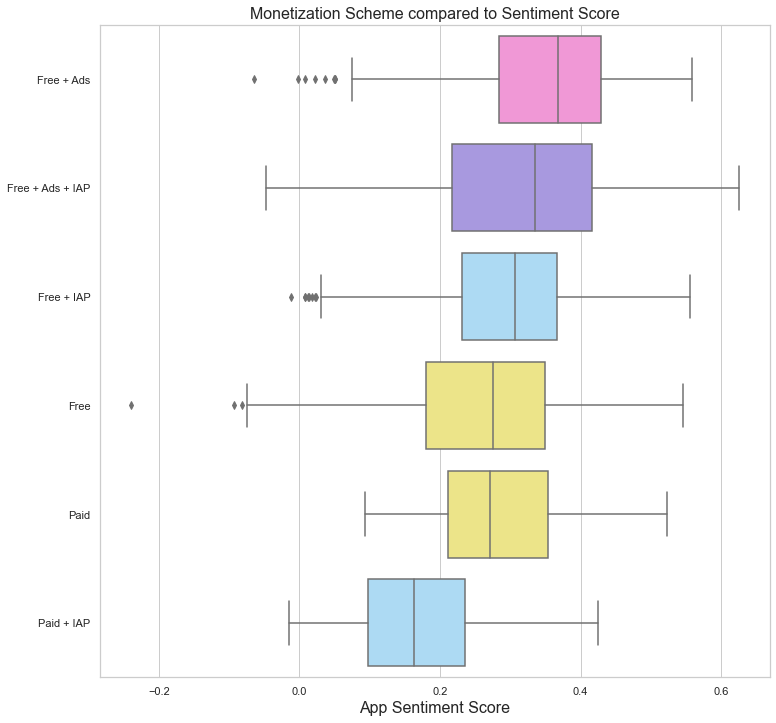

In [14]:
df_mone_full_med = df_mone_full_med.sort_values('TextSentiment',ascending=False)

colors = set_mone_colors(df_mone_full_med)

fig, ax = plt.subplots(figsize=(12, 12))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="TextSentiment", y="Monetization", data=df_mone_full,order = df_mone_full_med['Monetization'],palette=colors)   
plt.title('Monetization Scheme compared to Sentiment Score', fontsize=16)
plt.xlabel('App Sentiment Score', fontsize=16)
plt.ylabel('', fontsize=16)
plt.show()

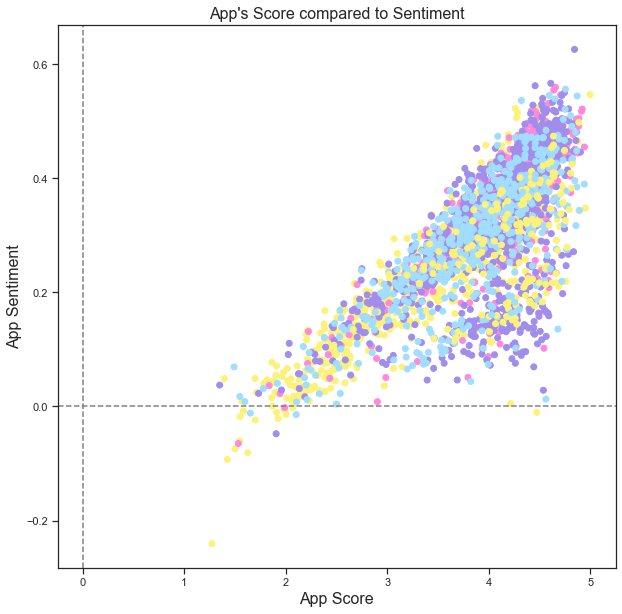

In [15]:
df_mone_full = df_mone_full.sort_values('Monetization',ascending=True)
colors = set_mone_colors(df_mone_full)

# Scatter plot
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 10))
plt.axvline(0,c=(0.5,0.5,0.5), ls='--')
plt.axhline(0,c=(0.5,0.5,0.5), ls='--')
plt.scatter(df_mone_full['Score'],df_mone_full['TextSentiment'],color=colors)
plt.title('App\'s Score compared to Sentiment', fontsize=16)
plt.xlabel('App Score', fontsize=16)
plt.ylabel('App Sentiment', fontsize=16)
plt.show()

# In App Product Ranges 

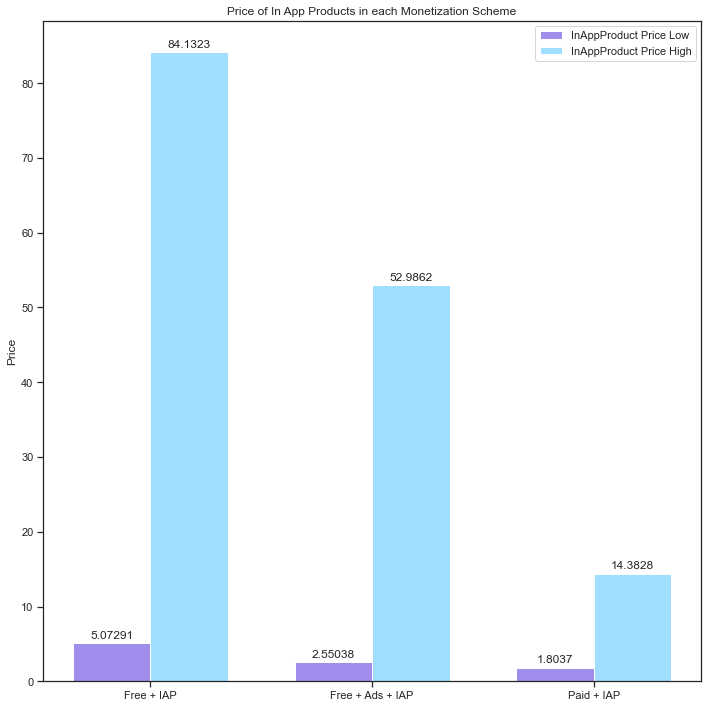

In [16]:
df_mone_full_iap = df_mone_full.drop(df_mone_full[df_mone_full.Monetization == 'Paid'].index)
df_mone_full_iap = df_mone_full_iap.drop(df_mone_full_iap[df_mone_full_iap.Monetization == 'Free + Ads'].index)
df_mone_full_iap = df_mone_full_iap.drop(df_mone_full_iap[df_mone_full_iap.Monetization == 'Free'].index)

df_mone_full_mean = df_mone_full_iap.groupby('Monetization').mean()
df_mone_full_mean = pd.DataFrame(df_mone_full_mean).reset_index()
df_mone_full_mean = df_mone_full_mean.rename(columns={'index':'Monetization'})
df_mone_full_mean = df_mone_full_mean.sort_values('InAppProductPrice Low',ascending=False)
df_mone_full_mean

colors = '#A1DDFF'

x = np.arange(len(df_mone_full_mean['Monetization']))
width = 0.35

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - width/2, df_mone_full_mean['InAppProductPrice Low'], width, label='InAppProduct Price Low',color='#A18DEB')
rects2 = ax.bar(x + width/2, df_mone_full_mean['InAppProductPrice High'], width, label='InAppProduct Price High',color='#A1DDFF')

ax.set_ylabel('Price')
ax.set_title('Price of In App Products in each Monetization Scheme')
ax.set_xticks(x, df_mone_full_mean['Monetization'])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()